In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf 
from tensorflow import keras
from tensorflow.python.keras.models import Sequential 
from tensorflow.python.keras.layers import Dense


## Simple Neural Network

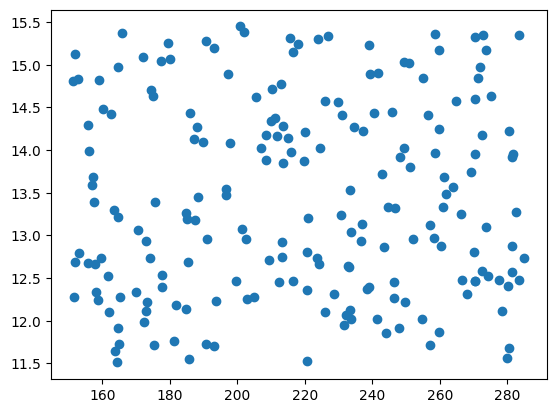

In [2]:
X = np.array([[185.32,  12.69],
       [259.92,  11.87],
       [231.01,  14.41],
       [175.37,  11.72],
       [187.12,  14.13],
       [225.91,  12.1 ],
       [208.41,  14.18],
       [207.08,  14.03],
       [280.6 ,  14.23],
       [202.87,  12.25],
       [196.7 ,  13.54],
       [270.31,  14.6 ],
       [192.95,  15.2 ],
       [213.57,  14.28],
       [164.47,  11.92],
       [177.26,  15.04],
       [241.77,  14.9 ],
       [237.  ,  13.13],
       [219.74,  13.87],
       [266.39,  13.25],
       [270.45,  13.95],
       [261.96,  13.49],
       [243.49,  12.86],
       [220.58,  12.36],
       [163.59,  11.65],
       [244.76,  13.33],
       [271.19,  14.84],
       [201.99,  15.39],
       [229.93,  14.56],
       [204.97,  12.28],
       [173.19,  12.22],
       [231.51,  11.95],
       [152.69,  14.83],
       [163.42,  13.3 ],
       [215.95,  13.98],
       [218.04,  15.25],
       [251.3 ,  13.8 ],
       [233.33,  13.53],
       [280.24,  12.41],
       [243.02,  13.72],
       [155.67,  12.68],
       [275.17,  14.64],
       [151.73,  12.69],
       [151.32,  14.81],
       [164.9 ,  11.73],
       [282.55,  13.28],
       [192.98,  11.7 ],
       [202.6 ,  12.96],
       [220.67,  11.53],
       [169.97,  12.34],
       [209.47,  12.71],
       [232.8 ,  12.64],
       [272.8 ,  15.35],
       [158.02,  12.34],
       [226.01,  14.58],
       [158.64,  12.24],
       [211.66,  14.17],
       [271.95,  14.97],
       [257.16,  11.71],
       [281.85,  13.96],
       [161.63,  12.52],
       [233.8 ,  13.04],
       [210.29,  14.72],
       [261.24,  13.69],
       [256.98,  13.12],
       [281.56,  13.92],
       [280.64,  11.68],
       [269.16,  13.74],
       [246.34,  12.27],
       [224.07,  12.66],
       [164.24,  11.51],
       [272.42,  14.18],
       [177.68,  12.53],
       [212.86,  14.77],
       [165.88,  15.37],
       [277.43,  12.48],
       [236.51,  12.94],
       [244.14,  11.85],
       [213.45,  13.85],
       [234.57,  14.27],
       [270.34,  12.47],
       [170.68,  13.06],
       [226.79,  15.34],
       [245.92,  14.45],
       [281.32,  12.57],
       [185.03,  13.19],
       [189.88,  14.1 ],
       [278.48,  12.11],
       [219.92,  14.21],
       [216.58,  15.15],
       [249.48,  15.03],
       [165.09,  12.28],
       [158.87,  14.82],
       [279.98,  11.56],
       [256.55,  14.41],
       [272.61,  12.58],
       [246.49,  12.45],
       [160.26,  14.48],
       [155.7 ,  14.3 ],
       [188.27,  13.45],
       [270.36,  12.47],
       [213.22,  12.92],
       [175.7 ,  13.39],
       [174.52,  14.7 ],
       [233.  ,  12.63],
       [281.37,  12.88],
       [240.62,  14.43],
       [185.81,  11.55],
       [270.5 ,  15.33],
       [172.98,  12.11],
       [208.41,  13.89],
       [283.51,  15.35],
       [283.36,  12.48],
       [230.85,  13.24],
       [181.24,  11.76],
       [172.78,  12.93],
       [161.88,  12.1 ],
       [156.03,  13.99],
       [216.52,  12.47],
       [221.06,  13.2 ],
       [238.99,  15.23],
       [197.69,  14.08],
       [179.55,  15.26],
       [233.39,  12.13],
       [184.7 ,  12.14],
       [174.18,  12.73],
       [261.11,  13.33],
       [187.42,  13.18],
       [186.1 ,  14.43],
       [157.94,  12.66],
       [193.64,  12.23],
       [249.65,  12.22],
       [190.56,  11.73],
       [252.  ,  12.96],
       [238.55,  12.37],
       [152.94,  12.79],
       [255.17,  14.85],
       [197.09,  14.89],
       [156.8 ,  13.59],
       [184.75,  13.26],
       [179.92,  15.07],
       [190.79,  15.28],
       [164.73,  13.22],
       [209.87,  14.34],
       [196.58,  13.47],
       [159.51,  12.74],
       [247.87,  11.92],
       [212.44,  12.45],
       [172.34,  11.99],
       [259.87,  14.25],
       [201.23,  13.07],
       [248.34,  13.92],
       [273.66,  15.18],
       [215.09,  14.14],
       [223.53,  12.74],
       [211.22,  14.38],
       [224.61,  14.03],
       [215.75,  15.31],
       [254.82,  12.02],
       [259.9 ,  15.17],
       [260.25,  12.87],
       [199.67,  12.47],
       [157.52,  13.39],
       [264.81,  14.58],
       [239.4 ,  14.89],
       [238.98,  12.39],
       [258.43,  12.97],
       [270.16,  12.81],
       [162.41,  14.42],
       [164.53,  14.98],
       [205.61,  14.62],
       [157.1 ,  13.68],
       [241.38,  12.02],
       [232.13,  12.07],
       [191.04,  12.96],
       [233.64,  12.02],
       [174.95,  14.63],
       [246.64,  13.32],
       [188.07,  14.27],
       [213.16,  12.75],
       [268.08,  12.31],
       [258.58,  13.97],
       [237.21,  14.23],
       [251.02,  15.02],
       [274.28,  12.52],
       [172.12,  15.09],
       [177.52,  12.39],
       [258.71,  15.36],
       [264.01,  13.57],
       [200.71,  15.45],
       [249.37,  14.02],
       [151.5 ,  12.28],
       [151.82,  15.13],
       [181.92,  12.18],
       [228.65,  12.31],
       [223.78,  15.3 ],
       [266.63,  12.48],
       [273.68,  13.1 ],
       [220.61,  12.8 ],
       [284.99,  12.73]])
Y = np.array([[1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.]])
plt.scatter(X[:,0], X[:,1])
plt.show()

In [ ]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.7, c='blue')  # 투명도와 색깔 추가
plt.xlim(X[:, 0].min() - 10, X[:, 0].max() + 10)  # x축 범위
plt.ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)  # y축 범위
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of Features')
plt.show()

In [25]:
 X[:,1]

array([12.69, 11.87, 14.41, 11.72, 14.13, 12.1 , 14.18, 14.03, 14.23,
       12.25, 13.54, 14.6 , 15.2 , 14.28, 11.92, 15.04, 14.9 , 13.13,
       13.87, 13.25, 13.95, 13.49, 12.86, 12.36, 11.65, 13.33, 14.84,
       15.39, 14.56, 12.28, 12.22, 11.95, 14.83, 13.3 , 13.98, 15.25,
       13.8 , 13.53, 12.41, 13.72, 12.68, 14.64, 12.69, 14.81, 11.73,
       13.28, 11.7 , 12.96, 11.53, 12.34, 12.71, 12.64, 15.35, 12.34,
       14.58, 12.24, 14.17, 14.97, 11.71, 13.96, 12.52, 13.04, 14.72,
       13.69, 13.12, 13.92, 11.68, 13.74, 12.27, 12.66, 11.51, 14.18,
       12.53, 14.77, 15.37, 12.48, 12.94, 11.85, 13.85, 14.27, 12.47,
       13.06, 15.34, 14.45, 12.57, 13.19, 14.1 , 12.11, 14.21, 15.15,
       15.03, 12.28, 14.82, 11.56, 14.41, 12.58, 12.45, 14.48, 14.3 ,
       13.45, 12.47, 12.92, 13.39, 14.7 , 12.63, 12.88, 14.43, 11.55,
       15.33, 12.11, 13.89, 15.35, 12.48, 13.24, 11.76, 12.93, 12.1 ,
       13.99, 12.47, 13.2 , 15.23, 14.08, 15.26, 12.13, 12.14, 12.73,
       13.33, 13.18,